# Evaluating auditory streaming complexity in renaissance polyphony
Developped for assessing complexity in a digital corpus of renaissance masse ordinary cycles using music21, Pandas, etc.

In [1]:
import music21 as m21
import copy
import operator
import json
import sys
import os
import time

import math
import numpy as np 
import scipy as sp
import pandas as pd
from bisect import bisect_left, bisect_right
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from collections import OrderedDict
from collections import deque
import pickle

import pingouin as pg

In [33]:
# import respy functions from asc.py file
%load_ext autoreload
%autoreload 1
%aimport asc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
os.chdir('./Test-scores')
f='Jos0802a-Missa_Fortuna_desperata-Kyrie.krn'
score = m21.converter.parse(f)
os.chdir('../plots')

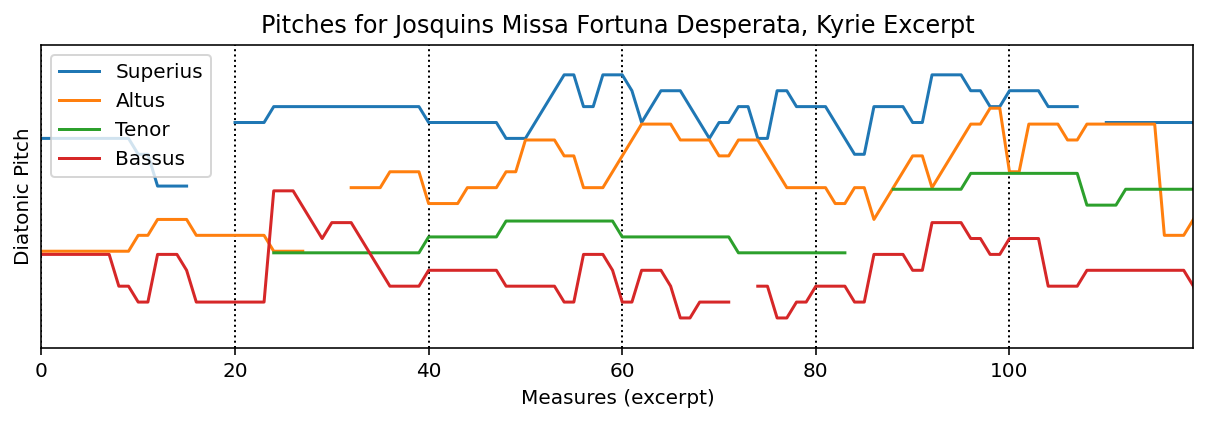

In [41]:
df_pitchs = asc.Score_Pitch_Steps(score)
x_r = np.array([0,119])
#x_r = np.array([180,299])

fig= plt.figure(figsize=(10,3))
axes= fig.add_axes([0.1,0.2,0.8,0.7])
clabels = df_pitchs.columns
for i in range(len(clabels)):    
    axes.plot(df_pitchs[clabels[i]]+-.1*i)
step = np.min(np.diff(df_pitchs.index))
plt.grid(color='k', linestyle=':', linewidth=1)
axes.legend(('Superius', 'Altus', 'Tenor','Bassus'))
axes.set_yticks([])
# axes.xaxis.set_ticks(np.arange(180,298,8))
# axes.xaxis.set_ticklabels(np.arange(1,16))
plt.xlabel('Measures (excerpt)')
plt.ylabel('Diatonic Pitch')
plt.title('Pitches for Josquin''s Missa Fortuna Desperata, Kyrie Excerpt')

axes.set_xbound(lower=x_r[0], upper=x_r[1])
plt.savefig("pitch_1.png",dpi = 300)
plt.show()

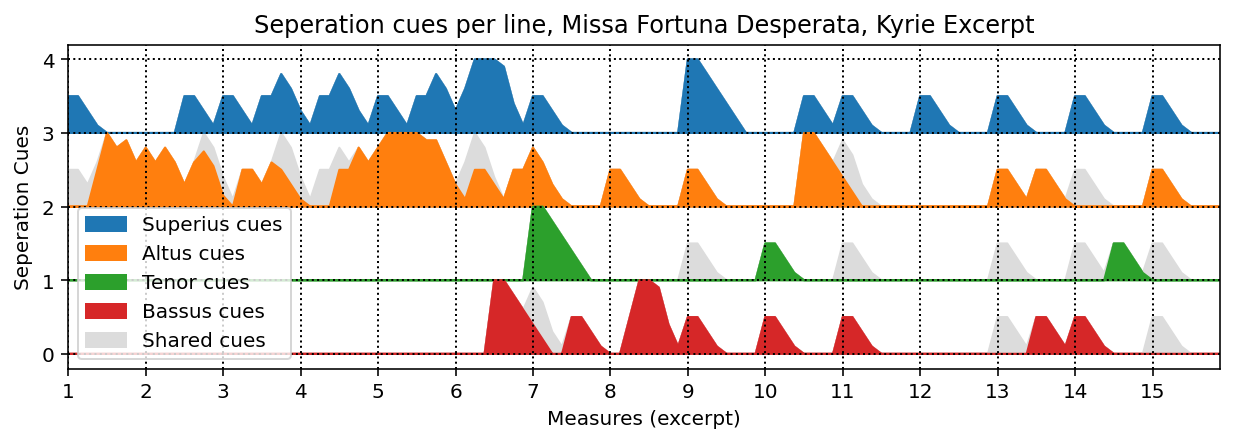

In [56]:
x_r = np.array([180,299])

fig= plt.figure(figsize=(10,3))
axes= fig.add_axes([0.1,0.15,0.8,0.75])

df_cues = asc.All_Cues(score)
df_seperated = asc.Streaming(score)

axes.fill_between(df_seperated.index,df_seperated['Voice_1']+3,3,color='C0')
axes.fill_between(df_seperated.index,df_seperated['Voice_2']+2,2,color='C1')
axes.fill_between(df_seperated.index,df_seperated['Voice_3']+1,1,color='C2')
axes.fill_between(df_seperated.index,df_seperated['Voice_4'],0,color='C3')

axes.fill_between(df_cues.index,df_cues['Voice_1']+3,3,color='gainsboro')
axes.fill_between(df_cues.index,df_cues['Voice_2']+2,2,color='gainsboro')
axes.fill_between(df_cues.index,df_cues['Voice_3']+1,1,color='gainsboro')
axes.fill_between(df_cues.index,df_cues['Voice_4'],0,color='gainsboro')

axes.fill_between(df_seperated.index,df_seperated['Voice_1']+3,3,color='C0')
axes.fill_between(df_seperated.index,df_seperated['Voice_2']+2,2,color='C1')
axes.fill_between(df_seperated.index,df_seperated['Voice_3']+1,1,color='C2')
axes.fill_between(df_seperated.index,df_seperated['Voice_4'],0,color='C3')
axes.set_xbound(lower=x_r[0], upper=x_r[1])
axes.xaxis.set_ticks(np.arange(180,298,8))
axes.xaxis.set_ticklabels(np.arange(1,16))
plt.xlabel('Measures (excerpt)')
plt.ylabel('Seperation Cues')
plt.title('Seperation cues per line, Missa Fortuna Desperata, Kyrie Excerpt')

plt.grid(color='k', linestyle=':', linewidth=1)
axes.legend(('Superius cues', 'Altus cues', 'Tenor cues','Bassus cues','Shared cues'),loc=3)
plt.savefig("cues_1.png",dpi = 300)

plt.show()


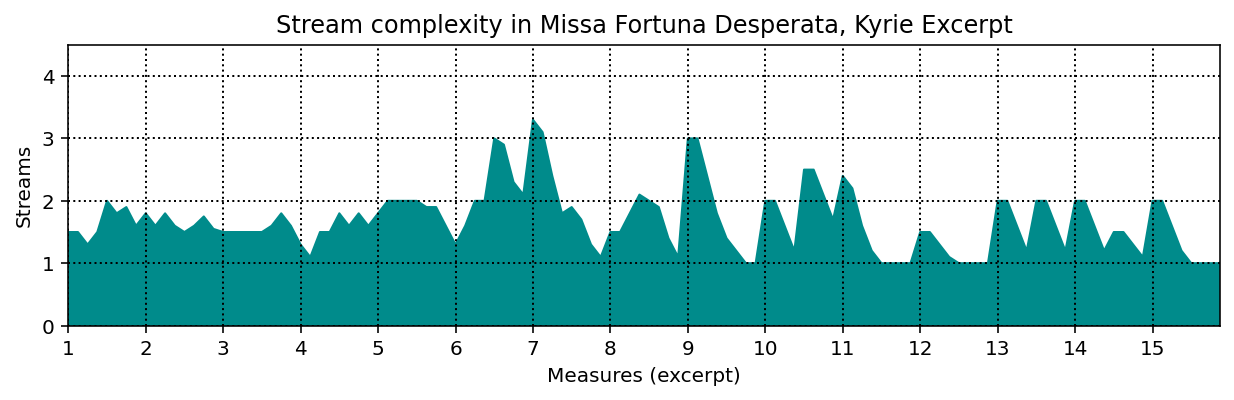

Voice_1    0.376263
Voice_2    0.349134
Voice_3    0.075325
Voice_4    0.171429
Total      1.945231
dtype: float64
692.0


In [57]:
x_r = np.array([180,299])
fig= plt.figure(figsize=(10,3))
axes= fig.add_axes([0.1,0.25,0.8,0.65])

#axes.plot(A,color='darkred',linewidth=2)
axes.fill_between(df_seperated.index,df_seperated['Total'],0,color="darkcyan")
axes.set_xbound(lower=x_r[0], upper=x_r[1])
axes.set_ybound(lower=0, upper=4.5)

axes.xaxis.set_ticks(np.arange(180,298,8))
axes.xaxis.set_ticklabels(np.arange(1,16))
plt.xlabel('Measures (excerpt)')
locs, labels = plt.yticks(np.arange(0, 4.5, step=1))
plt.grid(color='k', linestyle=':', linewidth=1)
plt.ylabel('Streams')
#axes.legend('Streaming Complexity')
plt.title('Stream complexity in Missa Fortuna Desperata, Kyrie Excerpt')

plt.savefig("Streams_1.png",dpi = 300)
plt.show()

print(df_seperated.mean())
print(A.index[-1])

In [82]:
os.chdir('../Test-scores')
f='Jos0802a-Missa_Fortuna_desperata-Kyrie.krn'
score = m21.converter.parse(f)
os.chdir('../plots')

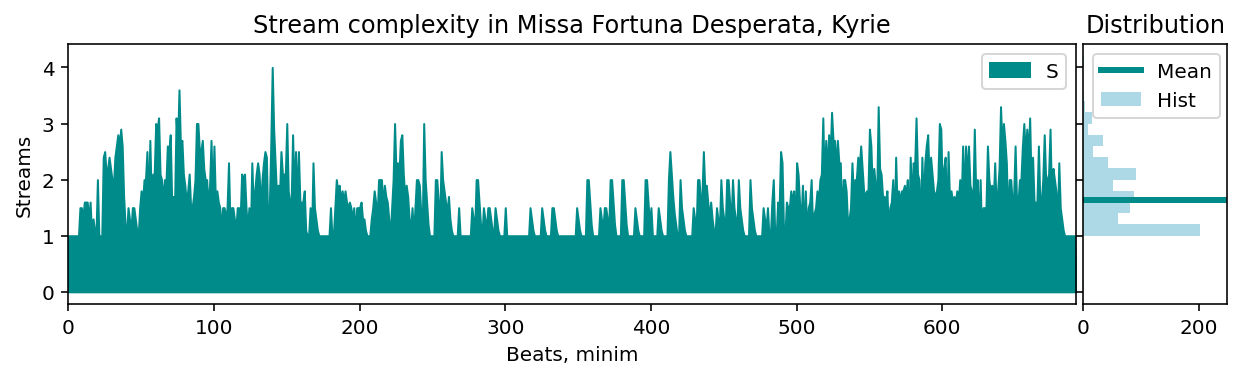

In [84]:
df_seperated = asc.Stream_Complexity_Smoothed(score)
x_r = [df_seperated.index[0],df_seperated.index[-1]]
#axes= fig.add_axes([0.1,0.25,0.8,0.65])

left, width = 0.1, 0.7
bottom, height = 0.2, 0.6
spacing = 0.005

rect_series = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.1, height]

# start with a square Figure
fig= plt.figure(figsize=(10,3))

ax = fig.add_axes(rect_series)
ax.fill_between(df_seperated.index,df_seperated['Total'],0,color="darkcyan")
ax.set_xbound(lower=x_r[0], upper=x_r[1])
ax.legend(('Streaming Complexity'))
plt.xlabel('Beats, minim')
plt.ylabel('Streams')
plt.title('Stream complexity in Missa Fortuna Desperata, Kyrie')

# now determine nice limits by hand:
binwidth = 0.2
ymax = np.max([np.max(np.abs(df_seperated['Total'])),np.max(np.abs(A))])
lim = (int(ymax/binwidth) + 1) * binwidth

ax_histy = fig.add_axes(rect_histy, sharey=ax)
bins = np.arange(0, lim + binwidth, binwidth)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(df_seperated['Total'], bins=bins, orientation='horizontal',color ='lightblue')
ax_histy.plot([0,500],[df_seperated['Total'].mean(),df_seperated['Total'].mean()],color ='darkcyan', linewidth=3)
ax_histy.set_xbound(lower=0, upper=250)
plt.title('Distribution')
ax_histy.legend(('Mean','Hist'))

plt.savefig("Streams_dist1.png",dpi = 300)
plt.show()

In [85]:
os.chdir('../Test-scores')
f='Jos0802e-Missa_Fortuna_desperata-Agnus.krn'
score = m21.converter.parse(f)
os.chdir('../plots')

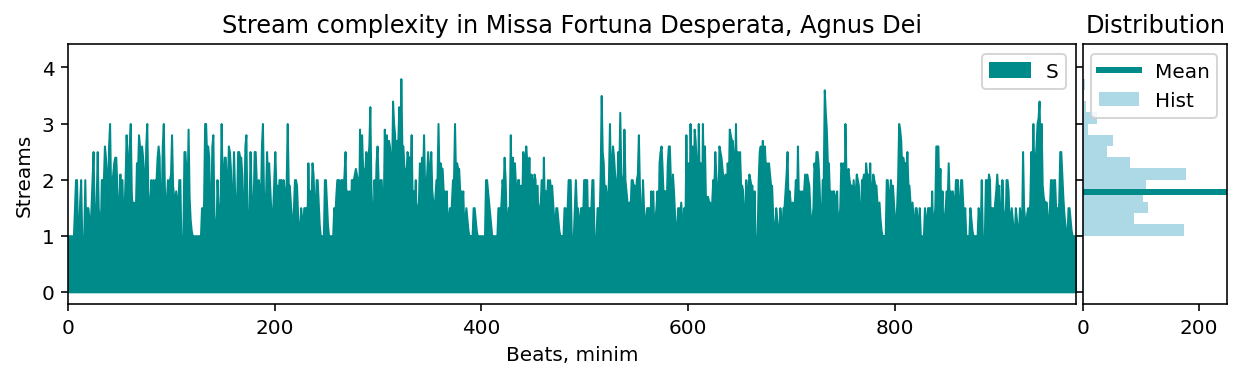

In [86]:
df_seperated = asc.Stream_Complexity_Smoothed(score)
x_r = [df_seperated.index[0],df_seperated.index[-1]]

left, width = 0.1, 0.7
bottom, height = 0.2, 0.6
spacing = 0.005

rect_series = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.1, height]

# start with a square Figure
fig= plt.figure(figsize=(10,3))

ax = fig.add_axes(rect_series)
ax.fill_between(df_seperated.index,df_seperated['Total'],0,color="darkcyan")
ax.set_xbound(lower=x_r[0], upper=x_r[1])
ax.legend(('Streaming Complexity'))
plt.xlabel('Beats, minim')
plt.ylabel('Streams')
plt.title('Stream complexity in Missa Fortuna Desperata, Agnus Dei')

# now determine nice limits by hand:
binwidth = 0.2
ymax = np.max([np.max(np.abs(df_seperated['Total'])),np.max(np.abs(A))])
lim = (int(ymax/binwidth) + 1) * binwidth

ax_histy = fig.add_axes(rect_histy, sharey=ax)
bins = np.arange(0, lim + binwidth, binwidth)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(df_seperated['Total'], bins=bins, orientation='horizontal',color ='lightblue')
ax_histy.plot([0,500],[df_seperated['Total'].mean(),df_seperated['Total'].mean()],color ='darkcyan', linewidth=3)
ax_histy.set_xbound(lower=0, upper=250)
plt.title('Distribution')
ax_histy.legend(('Mean','Hist'))

plt.savefig("Streams_dist2.png",dpi = 300)
plt.show()

# Prepare movement-wise statistics

In [93]:
os.chdir('/Users/finn/Documents/DDMAL/Scores')
f=open('Masses_CompSeries_Stream_3.pkl','rb')
S_Complexities=pickle.load(f)
f.close()

MusicIndex = S_Complexities['MusicIndex']
Counterpoint_seperated = S_Complexities['Streaming_Complexity']
Voices_counted = S_Complexities['Voice_Counts']

os.chdir('/Users/finn/dev/Stream-Complexity/plots/')

In [94]:
# fd carries over values from previous analysis, including metadata on each movement.
df=pd.DataFrame(columns=['Mass','MassID','Mvnt','Composer','CompID','C_Mean','C_Max','file'])

# choose form of complexity summary series to evaluate
Comp_Type = 'Counterpoint Complexity'
SC=Counterpoint_seperated

# fd carries over values from previous analysis, including metadata on each movement.
central_Stat = []
max_Stat = []
for i in range(len(SC)):
    df_seperated = SC[i]
    central_Stat=np.nanmean(df_seperated)
    max_Stat=np.nanmax(df_seperated)
    df = df.append({'Mass':MusicIndex.Mass[i],'MassID':MusicIndex.MassID[i],
                    'Mvnt':MusicIndex.Mvnt[i],'Composer':MusicIndex.Composer[i],
                    'CompID':MusicIndex.CompID[i], 'C_Mean':central_Stat,'C_Max':max_Stat,'file':MusicIndex.file},ignore_index=True)


# choose form of complexity summary series to evaluate

Comp_Type = 'Voice Counts'
VC=Voices_counted

# fd carries over values from previous analysis, including metadata on each movement.
central_Stat = []
max_Stat = []

for i in range(len(VC)):
    df_seperated = VC[i]
    central_Stat.append(np.nanmean(df_seperated))
    max_Stat.append(np.nanmax(df_seperated))
len(central_Stat)
# add to df
df.insert(7, "V_Mean", central_Stat, True)
df.insert(8, "V_Max", max_Stat, True)
df[:10]


,Mass,MassID,Mvnt,Composer,CompID,C_Mean,C_Max,V_Mean,V_Max,file
0,Missa_In_myne_zin,Agr1001,Gloria,Alexander Agricola,Agr,2.299890,4.0,3.050844,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
1,Missa_In_myne_zin,Agr1001,Credo,Alexander Agricola,Agr,2.247988,4.0,3.138184,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
2,Missa_In_myne_zin,Agr1001,Sanctus,Alexander Agricola,Agr,2.358921,4.0,3.032519,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
3,Missa_In_myne_zin,Agr1001,Agnus,Alexander Agricola,Agr,2.310808,4.0,3.089096,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
4,Missa_Malheur_me_bat,Agr1004,Kyrie,Alexander Agricola,Agr,2.313320,4.0,3.335535,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
5,Missa_Malheur_me_bat,Agr1004,Gloria,Alexander Agricola,Agr,2.090474,4.0,3.142288,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
6,Missa_Malheur_me_bat,Agr1004,Credo,Alexander Agricola,Agr,2.122405,4.0,3.312903,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
7,Missa_Malheur_me_bat,Agr1004,Sanctus,Alexander Agricola,Agr,1.984959,4.0,2.832017,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
8,Missa_Malheur_me_bat,Agr1004,Agnus,Alexander Agricola,Agr,2.252288,4.0,3.183663,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
9,Missa_Bergerette_savoysienne,Ano1001,Kyrie,Anonymus,Ano,2.043910,3.8,3.204423,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...


In [104]:
# reduce collection to relevant factors
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

# Restrict Cycle movements 
print(len(df))
mainCycle = ['Kyrie','Gloria', 'Credo', 'Sanctus', 'Agnus']
cyc_df = df[df.Mvnt.isin(mainCycle)]
cyc_df = cyc_df.reset_index(drop = True)
print(len(cyc_df))

# drop those few with insufficient voices to be worth calculating around
cyc_df = cyc_df[cyc_df.V_Max>2] 
cyc_df = cyc_df.reset_index(drop = True)
print(len(cyc_df))


cyc_df['Composer'].value_counts()

1051
1051
1042


Giovanni Pierluigi da Palestrina    494
Pierre de la Rue                    124
Tomás Luis de Victoria               90
Unverified Josquin                   77
Josquin des Prez                     60
Johannes Ockeghem                    49
Johannes Martini                     38
Marbrianus de Orto                   25
Guillaume Du Fay                     20
Anonymus                             15
Obrecht                              11
Johannes Tinctoris                   10
Alexander Agricola                    9
Antoine Busnoys                       5
Pipelare                              5
Ludwig Daser                          5
Antoine de Fevin                      5
Name: Composer, dtype: int64

In [106]:
cyc_df['V_Max'].value_counts()


4.0     546
5.0     274
6.0     151
8.0      36
3.0      15
7.0      10
9.0       5
12.0      5
Name: V_Max, dtype: int64

In [107]:
# Collects stats per mass cycle, df_cycles

# Cointerpoint complexity
Cycles = cyc_df.MassID.unique()
df_cycles = pd.DataFrame(columns=['Mass','MassID','Cycle_Mean','Cycle_Max','Composer'])
for mass in Cycles:
    mc = np.nanmean(cyc_df.loc[cyc_df['MassID'] == mass, 'C_Mean'])
    mc_m = np.nanmax(cyc_df.loc[cyc_df['MassID'] == mass, 'C_Max'])
    comps = cyc_df.loc[cyc_df['MassID'] == mass, 'Composer']
    massTitle = cyc_df.loc[cyc_df['MassID'] == mass, 'Mass']
    df_cycles = df_cycles.append({'Mass':massTitle.iloc[0],'MassID':mass,'Cycle_Mean':mc,'Cycle_Max':mc_m,'Composer':comps.iloc[0]},ignore_index=True)

# voice counts
central_Stat = []
max_Stat = []
for mass in Cycles:
    mc = np.nanmean(cyc_df.loc[cyc_df['MassID'] == mass, 'V_Mean'])
    mc_m = np.nanmax(cyc_df.loc[cyc_df['MassID'] == mass, 'V_Max'])
    central_Stat.append(mc)
    max_Stat.append(mc_m)
df_cycles.insert(5,'Voices_Mean', central_Stat, True)
df_cycles.insert(6,'Voices_Max', max_Stat, True)


In [108]:
os.chdir('/Users/finn/Documents/DDMAL/dev/complexity/masses')

# add the era range to the cycle stats.
df_EachMasse=pd.read_csv(r'MasseCycleList_2.csv')

os.chdir('/Users/finn/dev/Stream-Complexity/plots/')
df_cycles['Era'] = df_EachMasse['Unnamed: 4']

print(df_cycles['Era'].value_counts())

K = cyc_df.MassID
for i in range(len(df_cycles)):
    mass = df_cycles.loc[i,'MassID']
    e = df_cycles.loc[i,'Era']
    K = K.mask(cyc_df['MassID'] == mass,e)

cyc_df.insert(10,'Era', K, True)
print(cyc_df['Era'].value_counts())

df_cycles

1575-1600    97
1500-1525    51
1475-1500    28
1550-1575    23
1450-1475    17
Name: Era, dtype: int64
1575-1600    477
1500-1525    244
1475-1500    129
1550-1575    112
1450-1475     80
Name: Era, dtype: int64


,Mass,MassID,Cycle_Mean,Cycle_Max,Composer,Voices_Mean,Voices_Max,Era
0,Missa_In_myne_zin,Agr1001,2.304402,4.00,Alexander Agricola,3.077661,4.0,1475-1500
1,Missa_Malheur_me_bat,Agr1004,2.152689,4.00,Alexander Agricola,3.161281,4.0,1475-1500
2,Missa_Bergerette_savoysienne,Ano1001,2.083606,4.00,Anonymus,3.191342,4.0,1500-1525
3,Missa_Lardant_desir,Ano1025,1.934225,4.00,Anonymus,3.478662,4.0,1475-1500
4,Missa_Gross_senen,Ano1026,2.027072,4.00,Anonymus,3.054131,4.0,1450-1475
...,...,...,...,...,...,...,...,...
211,Missa_Salve,Vic1014,2.634452,5.35,Tomás Luis de Victoria,5.662462,8.0,1575-1600
212,Missa_Simile_Est_Regnum_Coelorum,Vic1015,2.522119,5.10,Tomás Luis de Victoria,4.259819,8.0,1575-1600
213,Missa_Surge_Propera,Vic1016,2.788225,5.30,Tomás Luis de Victoria,4.313021,6.0,1575-1600
214,Missa_Trahe_Me_Post_Te,Vic1017,2.626513,5.10,Tomás Luis de Victoria,4.440891,6.0,1575-1600


In [109]:

# generate stats relative to the mass cycle in cyc_df

RelComp = []
for i in range(len(cyc_df)):
    a = float(cyc_df.loc[i, 'C_Mean'] - df_cycles.loc[df_cycles['MassID'] == cyc_df.loc[i, 'MassID'],'Cycle_Mean'])
    RelComp.append(a)
cyc_df.insert(9,'C_R_Mean',RelComp,True)

RelComp = []
for i in range(len(cyc_df)):
    a = float(cyc_df.loc[i, 'C_Max'] - df_cycles.loc[df_cycles['MassID'] == cyc_df.loc[i, 'MassID'],'Cycle_Max'])
    RelComp.append(a)
cyc_df.insert(10,'C_R_Max',RelComp,True)

RelComp = []
for i in range(len(cyc_df)):
    a = float(cyc_df.loc[i, 'V_Mean'] - df_cycles.loc[df_cycles['MassID'] == cyc_df.loc[i, 'MassID'],'Voices_Mean'])
    RelComp.append(a)
cyc_df.insert(11,'V_R_Mean',RelComp,True)

RelComp = []
for i in range(len(cyc_df)):
    a = float(cyc_df.loc[i, 'V_Max'] - df_cycles.loc[df_cycles['MassID'] == cyc_df.loc[i, 'MassID'],'Voices_Max'])
    RelComp.append(a)
cyc_df.insert(12,'V_R_Max',RelComp,True)


cyc_df

,Mass,MassID,Mvnt,Composer,CompID,C_Mean,C_Max,V_Mean,V_Max,C_R_Mean,C_R_Max,V_R_Mean,V_R_Max,file,Era
0,Missa_In_myne_zin,Agr1001,Gloria,Alexander Agricola,Agr,2.299890,4.00,3.050844,4.0,-0.004512,0.00,-0.026817,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1475-1500
1,Missa_In_myne_zin,Agr1001,Credo,Alexander Agricola,Agr,2.247988,4.00,3.138184,4.0,-0.056414,0.00,0.060523,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1475-1500
2,Missa_In_myne_zin,Agr1001,Sanctus,Alexander Agricola,Agr,2.358921,4.00,3.032519,4.0,0.054519,0.00,-0.045142,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1475-1500
3,Missa_In_myne_zin,Agr1001,Agnus,Alexander Agricola,Agr,2.310808,4.00,3.089096,4.0,0.006407,0.00,0.011435,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1475-1500
4,Missa_Malheur_me_bat,Agr1004,Kyrie,Alexander Agricola,Agr,2.313320,4.00,3.335535,4.0,0.160630,0.00,0.174254,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1475-1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Missa_Vidi_Speciosam,Vic1018,Kyrie,Tomás Luis de Victoria,Vic,2.700760,5.05,4.600927,6.0,0.046305,-0.45,-0.446521,-1.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1575-1600
1038,Missa_Vidi_Speciosam,Vic1018,Gloria,Tomás Luis de Victoria,Vic,2.360265,4.35,4.988416,6.0,-0.294190,-1.15,-0.059032,-1.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1575-1600
1039,Missa_Vidi_Speciosam,Vic1018,Credo,Tomás Luis de Victoria,Vic,2.618438,4.65,4.752179,6.0,-0.036018,-0.85,-0.295269,-1.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1575-1600
1040,Missa_Vidi_Speciosam,Vic1018,Sanctus,Tomás Luis de Victoria,Vic,2.707813,5.50,4.588256,6.0,0.053357,0.00,-0.459192,-1.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1575-1600


In [110]:
print(cyc_df['Era'].value_counts())
years = cyc_df.Era.unique()
print(years)
eras = ['1450-1475', '1475-1500','1500-1525', '1525-1550', '1550-1575', '1575-1600']

df_Time = cyc_df['V_Max']

for i in range(len(eras)):
    print(eras[i])
    df_Time = df_Time.mask(cyc_df['Era'] == eras[i],i)

df_Time
cyc_df.insert(12,'Time',df_Time,True)


1575-1600    477
1500-1525    244
1475-1500    129
1550-1575    112
1450-1475     80
Name: Era, dtype: int64
['1475-1500' '1500-1525' '1450-1475' '1550-1575' '1575-1600']
1450-1475
1475-1500
1500-1525
1525-1550
1550-1575
1575-1600


# Hypothesis 1: Complexity over time

1575-1600    477
1500-1525    244
1475-1500    129
1550-1575    112
1450-1475     80
Name: Era, dtype: int64
LinregressResult(slope=0.12348407605708325, intercept=2.0087325981128115, rvalue=0.7093496724948529, pvalue=1.516113668766542e-39, stderr=0.0077915813336582535)


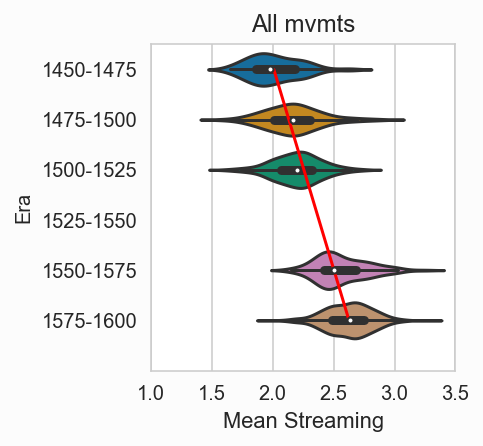

In [121]:
#boxplot on distributions by ERA

# SingleFactor on average values of summary stats on selected streaming complexity measure
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
# https://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/

# gather a random subset of movements per era overwhich to regress 
sampN = 50;
print(cyc_df['Era'].value_counts())
A = []
for i in range(7):
    if len(cyc_df.loc[cyc_df['Time'] == i])>sampN-1:
        A.append(cyc_df.loc[cyc_df['Time'] == i].sample(n=sampN))
times_df = pd.concat(A)

years = ['1450-1475', '1475-1500','1500-1525', '1525-1550', '1550-1575', '1575-1600']

fig = plt.figure(facecolor=(0.9, 0.9, 0.9, .1),figsize=(6,3))
#axes.set_title("Mean Streaming complexity and voice count per movement",fontsize=14)

bplot = plt.subplot(1, 2, 1)
st = 'C_Mean'
#bplot =sns.regplot(x=st, y='Time', data=times_df,y_jitter = 0.1);
sns.violinplot(y='Era', x=st,data=cyc_df,order=['1450-1475', '1475-1500','1500-1525', '1525-1550', '1550-1575', '1575-1600'],width=0.75,palette="colorblind",)
print(sp.stats.linregress(times_df['Time'],times_df[st]))
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(times_df['Time'],times_df[st])
#plt.plot(times_df[st], times_df['Time'], 'o', label='original data')
plt.plot(intercept + slope*times_df['Time'], times_df['Time'],'r', label='fitted line')

bplot.axes.set_xbound(lower=1,upper=3.5)
bplot.axes.set_ybound(lower=-0.5,upper=5.5)
bplot.set_xlabel("Mean Streaming",fontsize=11)
bplot.tick_params(labelsize=10)
bplot.set_yticks([0,1,2,3,4,5,6])
#bplot.set_yticklabels(years)
bplot.set_title('All mvmts')



plt.savefig("Era_trends.png",dpi = 300,bbox_inches = "tight")

1575-1600    477
1500-1525    244
1475-1500    129
1550-1575    112
1450-1475     80
Name: Era, dtype: int64
LinregressResult(slope=0.12289022450584758, intercept=2.0179678618769095, rvalue=0.7150677625329344, pvalue=1.9369596061634787e-40, stderr=0.007628791301069124)
1500-1525    184
1575-1600    130
1475-1500    105
1450-1475     72
1550-1575     55
Name: Era, dtype: int64
LinregressResult(slope=0.08968262149732492, intercept=2.006253533494711, rvalue=0.7211434604086516, pvalue=2.0568665500177406e-41, stderr=0.005470912099105061)


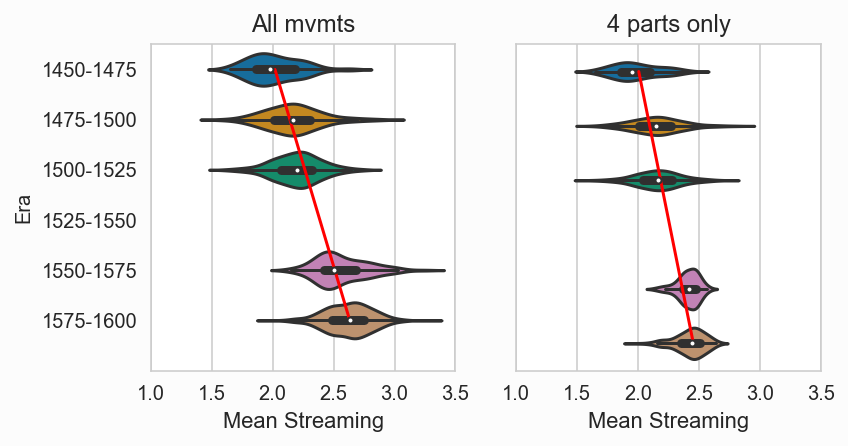

In [122]:
#boxplot on distributions by ERA

# SingleFactor on average values of summary stats on selected streaming complexity measure
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
# https://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/

# gather a random subset of movements per era overwhich to regress 
sampN = 50;
print(cyc_df['Era'].value_counts())
A = []
for i in range(7):
    if len(cyc_df.loc[cyc_df['Time'] == i])>sampN-1:
        A.append(cyc_df.loc[cyc_df['Time'] == i].sample(n=sampN))
times_df = pd.concat(A)

years = ['1450-1475', '1475-1500','1500-1525', '1525-1550', '1550-1575', '1575-1600']

fig = plt.figure(facecolor=(0.9, 0.9, 0.9, .1),figsize=(6,3))
#axes.set_title("Mean Streaming complexity and voice count per movement",fontsize=14)

bplot = plt.subplot(1, 2, 1)
st = 'C_Mean'
#bplot =sns.regplot(x=st, y='Time', data=times_df,y_jitter = 0.1);
sns.violinplot(y='Era', x=st,data=cyc_df,order=['1450-1475', '1475-1500','1500-1525', '1525-1550', '1550-1575', '1575-1600'],width=0.75,palette="colorblind",)
print(sp.stats.linregress(times_df['Time'],times_df[st]))
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(times_df['Time'],times_df[st])
#plt.plot(times_df[st], times_df['Time'], 'o', label='original data')
plt.plot(intercept + slope*times_df['Time'], times_df['Time'],'r', label='fitted line')

bplot.axes.set_xbound(lower=1,upper=3.5)
bplot.axes.set_ybound(lower=-0.5,upper=5.5)
bplot.set_xlabel("Mean Streaming",fontsize=11)
bplot.tick_params(labelsize=10)
bplot.set_yticks([0,1,2,3,4,5,6])
#bplot.set_yticklabels(years)
bplot.set_title('All mvmts')

A_df = cyc_df[cyc_df.V_Max==4]
print(A_df['Era'].value_counts())
A = []
for i in range(7):
    if len(A_df.loc[A_df['Time'] == i])>sampN:
        A.append(A_df.loc[A_df['Time'] == i].sample(n=sampN))
times_df = pd.concat(A)

bplot = plt.subplot(1, 2,2)
st = 'C_Mean'
#bplot =sns.regplot(x=st, y='Time', data=times_df,y_jitter = 0.1);
sns.violinplot(y='Era', x=st,data=A_df,order=['1450-1475', '1475-1500','1500-1525', '1525-1550', '1550-1575', '1575-1600'],width=0.75,palette="colorblind",)
print(sp.stats.linregress(times_df['Time'],times_df[st]))
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(times_df['Time'],times_df[st])
#plt.plot(times_df[st], times_df['Time'], 'o', label='original data')
plt.plot(intercept + slope*times_df['Time'], times_df['Time'],'r', label='fitted line')

bplot.axes.set_xbound(lower=1,upper=3.5)
bplot.axes.set_ybound(lower=-0.5,upper=5.5)
bplot.set_xlabel("Mean Streaming",fontsize=11)
bplot.tick_params('x',labelsize=10)
bplot.set_yticklabels([])
bplot.set_ylabel('')
bplot.set_title('4 parts only')

plt.savefig("Era_trends_w4.png",dpi = 300,bbox_inches = "tight")

In [112]:
# median performance of regression 

st = 'C_Mean'
k = []
kp = []
ks = []
kt = []
f = []
fp = []
for i in range (100):
    A = []
    B = []
    for i in range(7):
        if len(cyc_df.loc[cyc_df['Time'] == i])>sampN:
            A.append(cyc_df.loc[cyc_df['Time'] == i].sample(n=sampN))
            B.append(A[-1][st])
    times_df = pd.concat(A)
    a = sp.stats.linregress(times_df['Time'],times_df[st])
    k.append(a.rvalue**2)
    kp.append(a.pvalue)
    ks.append(a.slope)
    kt.append(a.slope/a.stderr)
    b = sp.stats.f_oneway(B[0],B[1],B[2],B[3],B[4]) # https://www.pythonfordatascience.org/anova-python/
    f.append(b.statistic)
    fp.append(b.pvalue)
print(st)
print(a)
print(b)
print(np.median(k))
print(np.median(kp))
print(np.median(ks))
print(np.median(kt))
print(np.median(f))
print(np.median(fp))

A_df = cyc_df[cyc_df.V_Max==4]
st = 'C_Mean'
k = []
kp = []
ks = []
kt = []
f = []
fp = []
for i in range (100):
    A = []
    B = []
    for i in range(7):
        if len(A_df.loc[A_df['Time'] == i])>sampN:
            A.append(A_df.loc[A_df['Time'] == i].sample(n=sampN))
            B.append(A[-1][st])
    times_df = pd.concat(A)
    a = sp.stats.linregress(times_df['Time'],times_df[st])
    k.append(a.rvalue**2)
    kp.append(a.pvalue)
    ks.append(a.slope)
    kt.append(a.slope/a.stderr)
    b = sp.stats.f_oneway(B[0],B[1],B[2],B[3],B[4]) # https://www.pythonfordatascience.org/anova-python/
    f.append(b.statistic)
    fp.append(b.pvalue)
print(st)
print(a)
print(b)
print(np.median(k))
print(np.median(kp))
print(np.median(ks))
print(np.median(kt))
print(np.median(f))
print(np.median(fp))


C_Mean
LinregressResult(slope=0.12048080768182202, intercept=2.0307753804752693, rvalue=0.7249370239217278, pvalue=4.91913643893211e-42, stderr=0.007269330928276446)
F_onewayResult(statistic=68.2916103366561, pvalue=9.270982732390425e-39)
0.5506578323679088
5.665224213095118e-45
0.12597910506264198
17.433245319963653
81.02975040979851
1.0300705414873084e-43
C_Mean
LinregressResult(slope=0.08630977513912429, intercept=2.0206254767595997, rvalue=0.6734684840843177, pvalue=2.1339207845559165e-34, stderr=0.0060157279630713)
F_onewayResult(statistic=55.47384200763761, pvalue=2.923544168918551e-33)
0.48529561320765213
1.3114129089047596e-37
0.08757078774423616
15.291558541255355
65.14639945128066
1.8428440395973847e-37


# Hypothesis 2: Complexity within Mass Ordinary Cycle

        Source         SS  DF1  DF2        MS          F         p-unc  \
0     Composer  59.034994   16  197  3.689687  30.422872  1.312118e-44   
1         Mvnt   3.089596    4  788  0.772399  67.976864  1.926122e-49   
2  Interaction   2.464609   64  788  0.038510   3.389124  9.423819e-16   

      p-GG-corr       np2       eps sphericity   W-spher       p-spher  
0           NaN  0.711890       NaN        NaN       NaN           NaN  
1  2.923728e-38  0.256539  0.880767      False  0.745923  6.583053e-09  
2           NaN  0.215845       NaN        NaN       NaN           NaN  


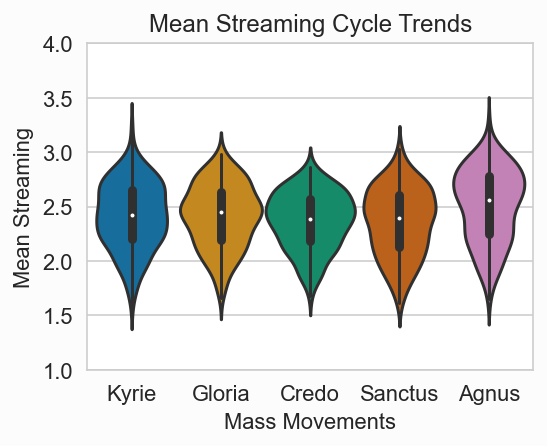

In [113]:
# relative voice count and complexity of mass movements

#fig = plt.figure(facecolor=(0.9, 0.9, 0.9, .1),figsize=(8,4))
fig = plt.figure(facecolor=(0.9, 0.9, 0.9, .1),figsize=(4,3))

bplot=sns.set_style("whitegrid")

st = 'C_Mean'   
aov = pg.mixed_anova(data=cyc_df, dv=st, within='Mvnt', subject='MassID', between = 'Composer', correction = True)
print(aov)
ax1 = sns.violinplot(x='Mvnt', y=st,data=cyc_df, 
                 width=1,palette="colorblind", order = mainCycle)
ax1.axes.set_xlabel("Relative Mean Streaming",fontsize=11)
ax1.axes.set_ybound(lower=1,upper=4)
ax1.set_ylabel("Mean Streaming",fontsize=11)
ax1.set_title("Mean Streaming Cycle Trends",fontsize=12)
ax1.set_xlabel("Mass Movements",fontsize=11)
ax1.tick_params(labelsize=11)

plt.savefig("Movements_" + st + ".png",dpi = 300,bbox_inches = "tight")


In [114]:
#https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html#pingouin.pairwise_gameshowell
st = 'C_R_Mean'
pg.pairwise_gameshowell(data=cyc_df, dv=st,between='Mvnt') 

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Agnus,Credo,0.095364,-0.040336,0.135700,0.012087,11.227141,401.162542,0.001000,1.103148
1,Agnus,Gloria,0.095364,-0.004602,0.099967,0.011852,8.434341,397.467702,0.001000,0.823624
2,Agnus,Kyrie,0.095364,0.003085,0.092280,0.012980,7.109106,422.647851,0.001000,0.688478
3,Agnus,Sanctus,0.095364,-0.056162,0.151526,0.011646,13.011092,390.179317,0.001000,1.269012
4,Credo,Gloria,-0.040336,-0.004602,-0.035733,0.010696,-3.340761,405.474202,0.008082,-0.329795
5,Credo,Kyrie,-0.040336,0.003085,-0.043420,0.011934,-3.638365,407.288989,0.002848,-0.356273
6,Credo,Sanctus,-0.040336,-0.056162,0.015826,0.010467,1.512001,403.102777,0.547858,0.149086
7,Gloria,Kyrie,-0.004602,0.003085,-0.007687,0.011697,-0.657221,404.683350,0.900000,-0.063956
8,Gloria,Sanctus,-0.004602,-0.056162,0.051559,0.010195,5.057153,412.007120,0.001000,0.495591
9,Kyrie,Sanctus,0.003085,-0.056162,0.059247,0.011487,5.157549,398.055515,0.001000,0.501285


77


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Agnus,Credo,0.074642,-0.038450,0.113092,0.055715,2.029840,24.711033,0.281930,0.710489
1,Agnus,Gloria,0.074642,0.008597,0.066045,0.052606,1.255462,21.363350,0.698102,0.447034
2,Agnus,Kyrie,0.074642,-0.008653,0.083295,0.055377,1.504158,24.598317,0.561972,0.518393
3,Agnus,Sanctus,0.074642,-0.037465,0.112107,0.057287,1.956932,26.348225,0.313942,0.674437
4,Credo,Gloria,-0.038450,0.008597,-0.047047,0.036985,-1.272031,25.867361,0.688041,-0.459448
5,Credo,Kyrie,-0.038450,-0.008653,-0.029797,0.040830,-0.729771,28.905955,0.900000,-0.255436
6,Credo,Sanctus,-0.038450,-0.037465,-0.000985,0.043386,-0.022695,28.896117,0.900000,-0.007944
7,Gloria,Kyrie,0.008597,-0.008653,0.017250,0.036474,0.472938,27.352702,0.900000,0.168400
8,Gloria,Sanctus,0.008597,-0.037465,0.046062,0.039314,1.171629,26.200680,0.742759,0.417184
9,Kyrie,Sanctus,-0.008653,-0.037465,0.028812,0.042951,0.670808,29.597057,0.900000,0.231187


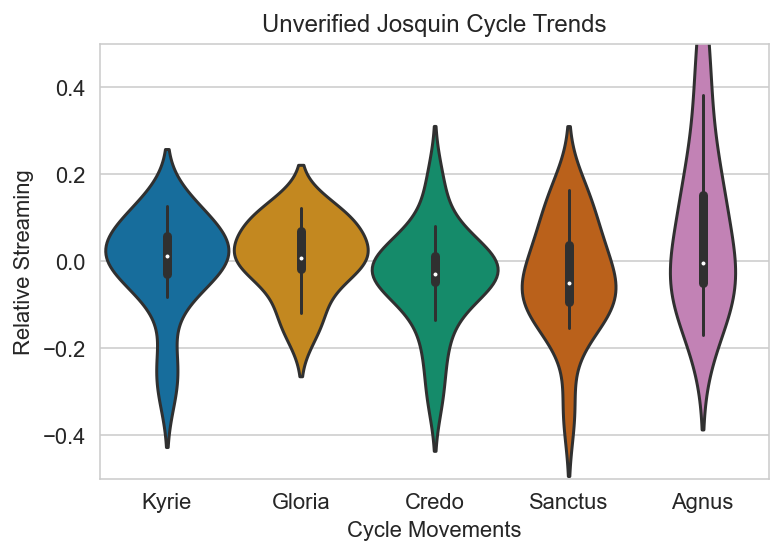

In [115]:
st = 'C_R_Mean'
Wanted_Comp = 'Unverified Josquin' #'Giovanni Pierluigi da Palestrina'#,'Tomás Luis de Victoria','Pierre de la Rue','Josquin des Prez','Unverified Josquin','Johannes Ockeghem']

Names = Wanted_Comp.split(' ')
Sub_df = cyc_df[cyc_df.Composer==Wanted_Comp]
print(len(Sub_df))

 
ax1 = sns.violinplot(x='Mvnt', y=st,data=Sub_df, width=1,palette="colorblind", order = mainCycle)
ax1.axes.set_xlabel("Relative Mean Streaming",fontsize=11)
ax1.axes.set_ybound(lower=-0.5,upper=0.5)
ax1.set_ylabel("Relative Streaming",fontsize=11)
ax1.set_title(Wanted_Comp + " Cycle Trends",fontsize=12)
ax1.set_xlabel("Cycle Movements",fontsize=11)
ax1.tick_params(labelsize=11)


pg.pairwise_gameshowell(data=Sub_df, dv=st,between='Mvnt') 

494
60


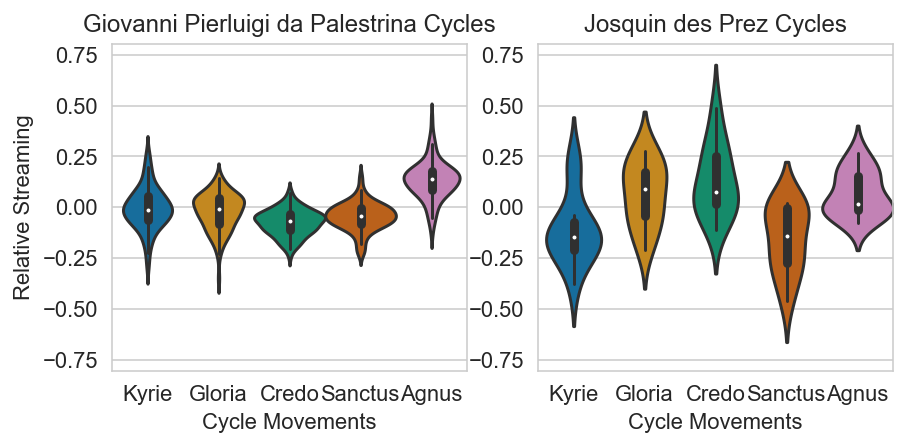

In [117]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
st = 'C_R_Mean'

Wanted_Comp = 'Giovanni Pierluigi da Palestrina' #'Giovanni Pierluigi da Palestrina'#,'Tomás Luis de Victoria','Pierre de la Rue','Josquin des Prez','Unverified Josquin','Johannes Ockeghem']
Names = Wanted_Comp.split(' ')
Sub_df = cyc_df[cyc_df.Composer==Wanted_Comp]
print(len(Sub_df))
sns.violinplot(x='Mvnt', y=st,data=Sub_df, width=1,palette="colorblind", order = mainCycle,ax=ax1)
ax1.axes.set_xlabel("Relative Mean Streaming",fontsize=11)
ax1.axes.set_ybound(lower=-0.8,upper=0.8)
ax1.set_ylabel("Relative Streaming",fontsize=11)
ax1.set_title(Wanted_Comp + " Cycles",fontsize=12)
ax1.set_xlabel("Cycle Movements",fontsize=11)
ax1.tick_params(labelsize=11)

pg.pairwise_gameshowell(data=Sub_df, dv=st,between='Mvnt')  

Wanted_Comp = 'Josquin des Prez' #'Giovanni Pierluigi da Palestrina'#,'Tomás Luis de Victoria','Pierre de la Rue','Josquin des Prez','Unverified Josquin','Johannes Ockeghem']
Names = Wanted_Comp.split(' ')
Sub_df = cyc_df[cyc_df.Composer==Wanted_Comp]
print(len(Sub_df))
sns.violinplot(x='Mvnt', y=st,data=Sub_df, width=1,palette="colorblind", order = mainCycle,ax=ax2)
ax2.axes.set_xlabel("Relative Mean Streaming",fontsize=11)
ax2.axes.set_ybound(lower=-0.8,upper=0.8)
ax2.set_ylabel("",fontsize=11)
ax2.set_title(Wanted_Comp + " Cycles",fontsize=12)
ax2.set_xlabel("Cycle Movements",fontsize=11)
ax2.tick_params(labelsize=11)

pg.pairwise_gameshowell(data=Sub_df, dv=st,between='Mvnt') 

plt.savefig("composers_2_" + st + ".png",dpi = 300,bbox_inches = "tight")



60


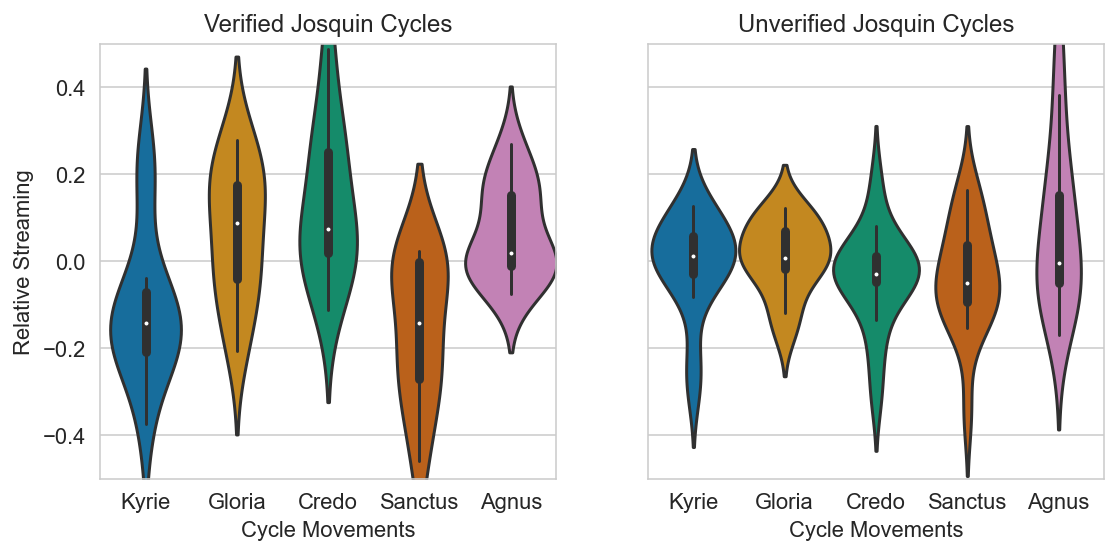

In [118]:
# Josquin and not
# Composers 

st = 'C_R_Mean'
Wanted_Comp = 'Josquin des Prez'
Names = Wanted_Comp.split(' ')
Sub_df = cyc_df[cyc_df.Composer==Wanted_Comp]
print(len(Sub_df))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

#bplot=sns.set_style("whitegrid")

plt.subplot(1,2,1)
st = 'C_R_Mean'    
ax1 = sns.violinplot(x='Mvnt', y=st,data=Sub_df, width=1,palette="colorblind", order = mainCycle)
ax1.axes.set_xlabel("Relative Mean Streaming",fontsize=11)
ax1.axes.set_ybound(lower=-0.5,upper=0.5)
ax1.set_ylabel("Relative Streaming",fontsize=11)
ax1.set_title("Verified Josquin Cycles",fontsize=12)
ax1.set_xlabel("Cycle Movements",fontsize=11)
ax1.tick_params(labelsize=11)

Wanted_Comp = 'Unverified Josquin'
Names = Wanted_Comp.split(' ')
Sub_df = cyc_df[cyc_df.Composer==Wanted_Comp]

plt.subplot(1,2,2)
ax2 = sns.violinplot(x='Mvnt', y=st,data=Sub_df, 
                 width=1,palette="colorblind", order = mainCycle)
ax2.axes.set_ybound(lower=-0.5,upper=0.5)
ax2.set_xlabel("Cycle Movements",fontsize=11)
ax2.set_ylabel('')
ax2.set_title("Unverified Josquin Cycles",fontsize=12)
ax2.tick_params(labelsize=11)
ax2.set_yticklabels([])

plt.savefig("Josquin_Movements.png",dpi = 400,bbox_inches = "tight")

494


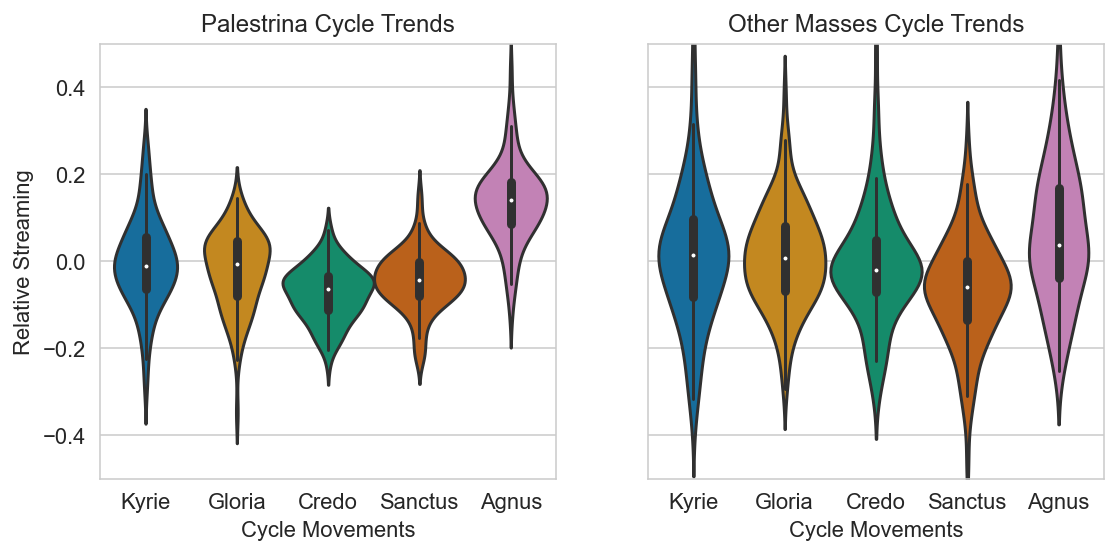

In [119]:
# Palestrina effect? 
# Composers 
# exclude Palistrina because so so many 

st = 'C_R_Mean'
Wanted_Comp = 'Giovanni Pierluigi da Palestrina'#,'Tomás Luis de Victoria','Pierre de la Rue','Josquin des Prez','Unverified Josquin','Johannes Ockeghem']

Names = Wanted_Comp.split(' ')
Sub_df = cyc_df[cyc_df.Composer==Wanted_Comp]
print(len(Sub_df))
pg.pairwise_gameshowell(data=Sub_df, dv=st,between='Mvnt')  

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

#bplot=sns.set_style("whitegrid")
plt.subplot(1,2,1)
st = 'C_R_Mean'    
ax1 = sns.violinplot(x='Mvnt', y=st,data=Sub_df, width=1,palette="colorblind", order = mainCycle)
ax1.axes.set_xlabel("Relative Mean Streaming",fontsize=11)
ax1.axes.set_ybound(lower=-0.5,upper=0.5)
ax1.set_ylabel("Relative Streaming",fontsize=11)
ax1.set_title("Palestrina Cycle Trends",fontsize=12)
ax1.set_xlabel("Cycle Movements",fontsize=11)
ax1.tick_params(labelsize=11)

Sub_df = cyc_df[cyc_df.Composer!=Wanted_Comp]
pg.pairwise_gameshowell(data=Sub_df, dv=st,between='Mvnt')  

plt.subplot(1,2,2)
ax2 = sns.violinplot(x='Mvnt', y=st,data=Sub_df, 
                 width=1,palette="colorblind", order = mainCycle)
ax2.axes.set_ybound(lower=-0.5,upper=0.5)
ax2.set_xlabel("Cycle Movements",fontsize=11)
ax2.set_ylabel('')
ax2.set_title("Other Masses Cycle Trends",fontsize=12)
ax2.tick_params(labelsize=11)
ax2.set_yticklabels([])

plt.savefig("Palestrina_Movements.png",dpi = 400,bbox_inches = "tight")
plt.show()